-----------------------------------------
#### Building our first interactive, augmented LLM application
------------------------------------

In [20]:
#pip install llama-index
#pip install llama-index-readers-web

In [21]:
from llama_index.core import Document, SummaryIndex
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.readers.wikipedia import WikipediaReader

In [22]:
loader = WikipediaReader()

In [23]:
documents = loader.load_data(pages=["Messi Lionel"])

In [24]:
len(documents)

1

In [25]:
from pprint import pprint

In [26]:
# Function to pretty print document content and metadata
def pretty_print_documents(documents):
    for doc in documents:
        print(f"Document ID: {doc.id_}")
        print("Metadata:")
        pprint(doc.metadata, indent=4)
        print("\nContent:")
        print(doc.text)
        print("="*80)  # separator between documents

# Call the function
pretty_print_documents(documents)

Document ID: 2150841
Metadata:
{}

Content:
Lionel Andrés "Leo" Messi (Spanish pronunciation: [ljoˈnel anˈdɾes ˈmesi] ; born 24 June 1987) is an Argentine professional footballer who plays as a forward for and captains both Major League Soccer club Inter Miami and the Argentina national team. Widely regarded as one of the greatest players of all time, Messi set numerous records for individual accolades won throughout his professional footballing career such as eight Ballon d'Or awards and eight times being named the world's best player by FIFA. He is the most decorated player in the history of professional football having won 45 team trophies, including twelve league titles, four UEFA Champions Leagues, two Copa Américas, and one FIFA World Cup. Messi holds the records for most European Golden Shoes (6), most goals for a single club (672, with Barcelona), most goals (474), hat-tricks (36) and assists (192) in La Liga, most matches played (39), assists (18) and goal contributions (34) i

Example - SimpleNodeParser

In [27]:
parser = SimpleNodeParser.from_defaults()

In [28]:
nodes = parser.get_nodes_from_documents(documents)

In [29]:
len(nodes)

20

In [30]:
index = SummaryIndex(nodes)

In [31]:
query_engine = index.as_query_engine()

In [32]:
print("Ask me anything about Lionel Messi!")

Ask me anything about Lionel Messi!


In [33]:
while True:
    question = input("Your question: ")
    if question.lower() == "exit":
    
        break
    response = query_engine.query(question)
    print(response)

Your question:  exit


**quick walk-through for the code**

#### Step 1: Load the Wikipedia Page
- Load a Wikipedia page on Lionel Messi as a Document using the WikipediaReader data loader.
- This ingests the raw text data.
document = WikipediaReader.load_page("Lionel Messi")

#### Step 2: Parse the Document into Nodes
- Parse the Document into smaller Node chunks using SimpleNodeParser.
- This splits the text into logical segments.
nodes = SimpleNodeParser.parse(document)

#### Step 3: Build SummaryIndex from Nodes
- Build a SummaryIndex from the Nodes.
- This organizes the Nodes sequentially for full context retrieval.
summary_index = SummaryIndex.build(nodes)

#### Step 4: Define QueryEngine
- Define QueryEngine, forming a complete query pipeline.
query_engine = QueryEngine( summary_index )

#### Step 5: Create a Query Loop
- Create a loop that queries the index, passing our question to QueryEngine.
- his handles retrieving relevant Nodes, prompting the LLM, and returning the final response.
for question in questions:
    response = query_engine.query(question)
    print(response)


#### we want to know exactly what happens behind the scenes

- Using the logging features of LlamaIndex 
    - to understand the logic and debug our applications

#### Customizing the LLM used by LlamaIndex

In [34]:
from llama_index.llms.openai import OpenAI
from llama_index.core.settings import Settings

In [35]:
# higher will lead to more creative, less deterministic responses
Settings.llm = OpenAI(temperature=0.01, model="gpt-4o-mini")

# Make sure you add the Settings.llm line immediately after your imports


In [36]:
from llama_index.core.schema import TextNode
from llama_index.core import SummaryIndex

In [37]:
nodes = [
    TextNode(text="Lionel Messi's hometown is Rosario."),
    TextNode(text="He was born on June 24, 1987.")
]

In [38]:
index = SummaryIndex(nodes)

In [39]:
query_engine = index.as_query_engine()

In [40]:
response = query_engine.query(
    "What is Messi's hometown?"
)
print(response)

Messi's hometown is Rosario.


#### The temperature parameter

- On OpenAI models such as GPT-3.5 and GPT-4, this parameter controls the randomness and creativity of the AI’s responses.

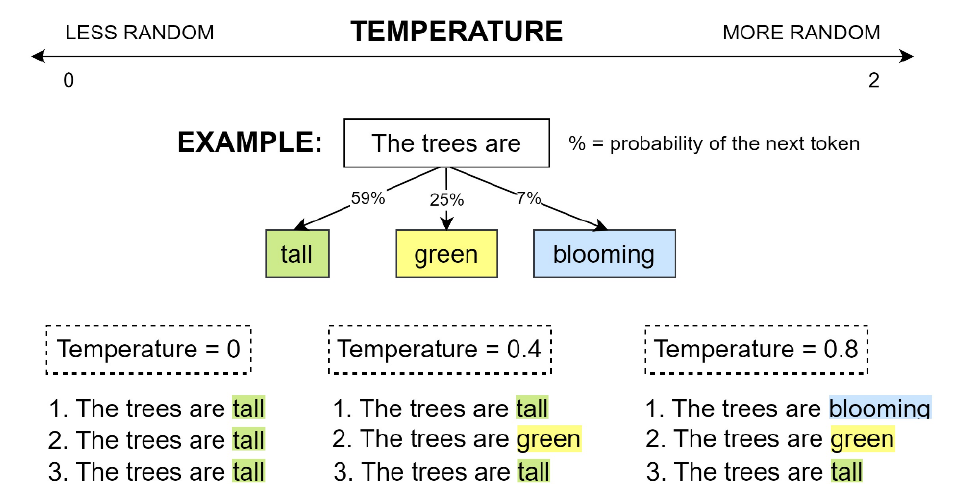